<a href="https://colab.research.google.com/github/spandit98/Hotel-Booking-EDA-Analysis/blob/main/Soumyadeep's_bit_of_Hotel_Booking_EDA-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_dir = ('/content/drive/MyDrive/')
hotel_booking = pd.read_csv(hotel_dir + '/Copy of Hotel Bookings.csv')

In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
list(hotel_booking.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

## **Purpose of the Analysis**
###To analyse the market precisely, we have planned to bifurcate the analysis into a set of questions on which we would work up on,

###1. Prefered part of the week by guests.

In [ ]:
hotel_booking.groupby(['hotel'])['hotel'].count()

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
week_data = pd.DataFrame(hotel_booking[['stays_in_weekend_nights', 'stays_in_week_nights']])
week_data

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2
...,...,...
119385,2,5
119386,2,5
119387,2,5
119388,2,5


In [ ]:
x = week_data.sum()

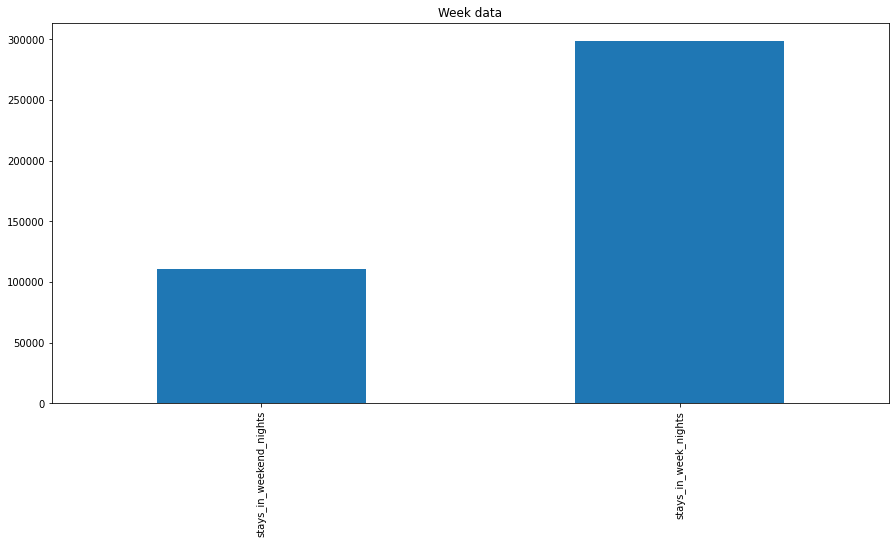

In [ ]:
x.plot(kind = 'bar', figsize = (15,7), title = 'Week data')

Seems that the people mostly tend to break the myth about hotels being occupied at weekends.

### 2. Which month had most number of guests in both hotels?

In [ ]:
hb = hotel_booking.groupby('arrival_date_month')['arrival_date_month'].count().sort_values(ascending = False)
hb

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
y = pd.DataFrame(hotel_booking['arrival_date_month'].value_counts())
x = y.reset_index()
x.columns = ['arrival_date_month','counts']
x

,arrival_date_month,counts
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


In [ ]:
hotel_booking['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

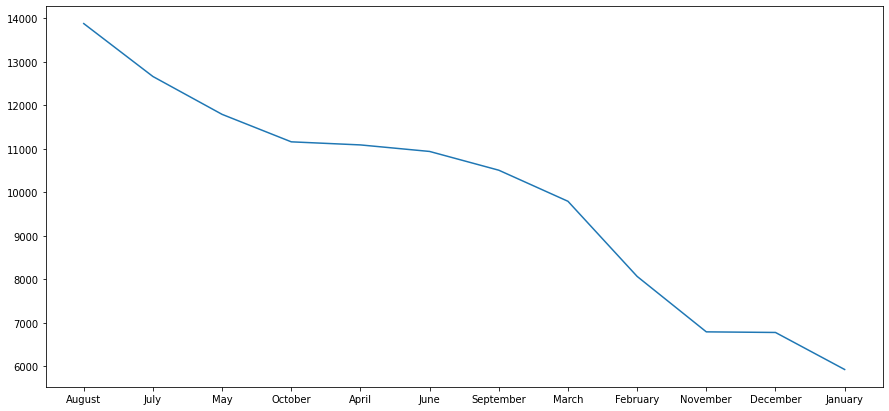

In [ ]:
figsize=plt.figure(figsize = (15,7))
plt.plot(x['arrival_date_month'], x['counts'],)
plt.show()

It seems that most number of guests prefer to visit the hotels at that location during end-summer and monsoon, i.e. May, June, July, August. Amongst which, the month August had most number of guests.

### 3. How many guests prefer to visit repetitively?

In [ ]:
hotel_booking.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

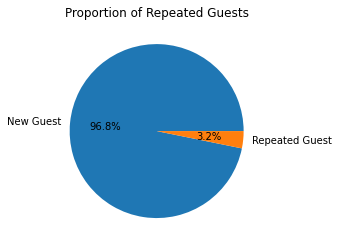

In [ ]:
plt.pie(hotel_booking["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"],autopct='%1.1f%%')
plt.title ("Proportion of Repeated Guests")

Seems that not a much amount of guests prefer to visit the hotels in that area repititively. 

### 4. How many kids do we have the most among the hotels?

In [ ]:
children = hotel_booking.groupby('hotel')['children'].sum()
children

hotel
City Hotel      7248.0
Resort Hotel    5155.0
Name: children, dtype: float64

In [ ]:
cdf = pd.DataFrame(children).reset_index()
cdf

,hotel,children
0,City Hotel,7248.0
1,Resort Hotel,5155.0


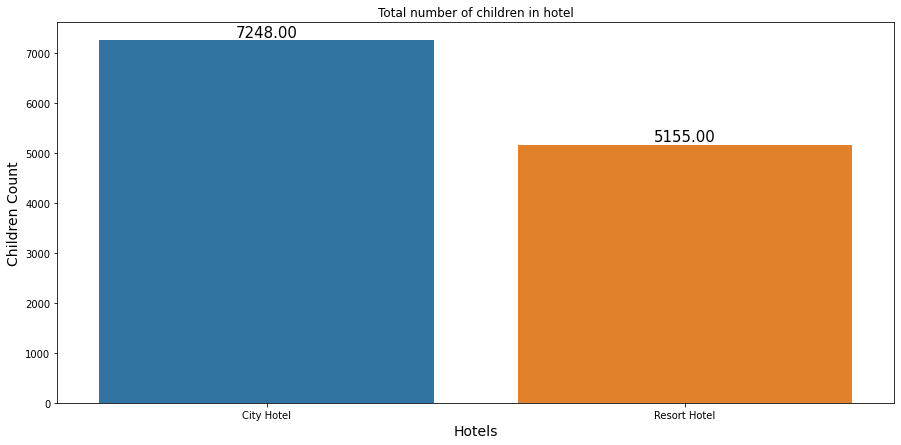

In [ ]:
# Importing seaborn library
# Plotting graph
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(15, 7))


# From which datafarme the values are to be picked
plots = sns.barplot(x=cdf['hotel'], y=cdf['children'], data=cdf)


# Iterrating over the bars one-by-one
for bar in plots.patches:
    

    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Hotels", size=14)

# Setting the label for y-axis
plt.ylabel("Children Count", size=14)

# Setting the title for the graph
plt.title("Total number of children in hotel")

# Fianlly showing the plot
plt.show()

Seems that the city hotel welcomes the most number of children. Which is the area where they can make more profit by adding a kids section or including gaming activities in their package.

### 5. What are the types of meals that the corporates prefer in their visit?

In [ ]:
corporate_meal = hotel_booking.loc[hotel_booking['market_segment'] == 'Corporate', ['market_segment','meal']]

In [ ]:
cm = corporate_meal.groupby(['meal'])['meal'].count()
cm

meal
BB           5150
FB             14
HB             83
SC             33
Undefined      15
Name: meal, dtype: int64

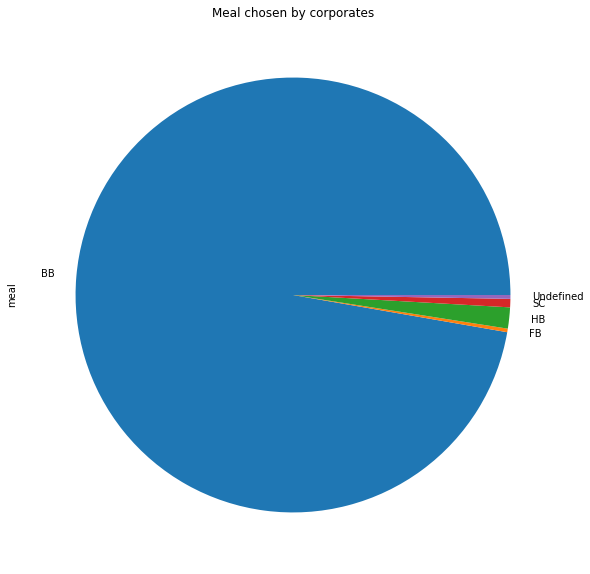

In [ ]:
cm.plot(kind = 'pie', figsize = (20,10), title = 'Meal chosen by corporates')

Seems that corporates mostly prefer Bed and Breakfast package at the hotel, i.e. they check-in at night and check-out by the next morning. There seems to be and opportunity to make customizations available for the corporates, which will attract more of them.

### 6. How is the ADR distribution? Why is there a significant outlier?

In [ ]:
hotel_booking["adr"].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


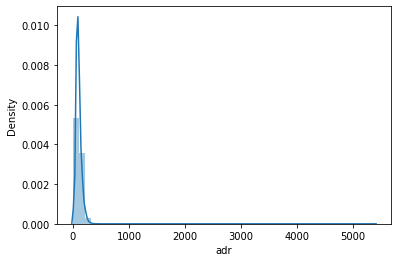

In [ ]:
sns.distplot(hotel_booking["adr"])

It seems that the distribution is positively skewed, which means that the data distribution is concentrated on the lower values. Here, I would like to try check further on the outliers by using boxplot.

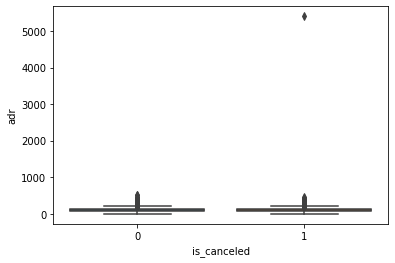

In [ ]:
sns.boxplot(x="is_canceled", y="adr", data=hotel_booking)

It seems there is one value which is very high compared to the other values. Based on the describe() data we have made previously, we can safely assume that is the max value (which is very far even from the value of Q3 ("75%").

In [ ]:
hotel_booking[hotel_booking["adr"]==hotel_booking["adr"].describe()["max"]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


Since the other piece of information seems to be normal booking (2 adults, for 1 ngiht), could this specific outlier caused by system error? Let's try delete this specific data and see how it affects the distribution.

In [ ]:
adr_deletmax=hotel_booking[hotel_booking["adr"]!=5400]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


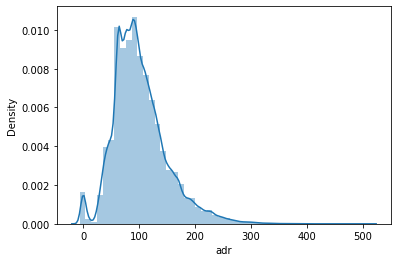

In [ ]:
sns.distplot(adr_deletmax["adr"])

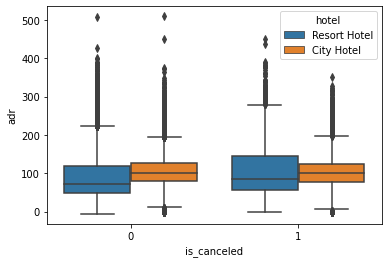

In [ ]:
sns.boxplot(x="is_canceled", y="adr", hue="hotel", data=adr_deletmax)

It seems that one specific data was a human/system error, since it was only 1 data out of this huge dataset.

###7. How is the guest growth throughout the year?

In [ ]:
hotel_booking["arrival_date_month_year"]=hotel_booking["arrival_date_month"].astype("str")+" "+hotel_booking["arrival_date_year"].astype("str")

In [ ]:
hotel_booking["total_guest"]=hotel_booking["adults"]+hotel_booking["children"]

In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_year,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,July 2015,2.0


In [ ]:
guest_resort=0
guest_city=0
guest_resort_monthly=[]
guest_city_monthly=[]

for month_year in hotel_booking["arrival_date_month_year"].unique():
  for i in range(len(hotel_booking)):
    if (hotel_booking["arrival_date_month_year"][i]==month_year)&(hotel_booking["is_canceled"][i]==0)&(hotel_booking["hotel"][i]=="Resort Hotel"):
      guest_resort+=hotel_booking["total_guest"][i]
    elif (hotel_booking["arrival_date_month_year"][i]==month_year)&(hotel_booking["is_canceled"][i]==0)&(hotel_booking["hotel"][i]=="City Hotel"):
      guest_city+=hotel_booking["total_guest"][i]
  guest_resort_monthly.append(guest_resort)
  guest_city_monthly.append(guest_city)

In [ ]:
hotel_booking["arrival_date_month_year"].unique()

array(['July 2015', 'August 2015', 'September 2015', 'October 2015',
       'November 2015', 'December 2015', 'January 2016', 'February 2016',
       'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016',
       'August 2016', 'September 2016', 'October 2016', 'November 2016',
       'December 2016', 'January 2017', 'February 2017', 'March 2017',
       'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017'],
      dtype=object)

In [ ]:
guestdf=pd.DataFrame(list(zip(hotel_booking["arrival_date_month_year"].unique(),guest_resort_monthly, guest_city_monthly)), columns=["Month_Year","Total Guest Resort Hotel", "Total Guest City Hotel"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

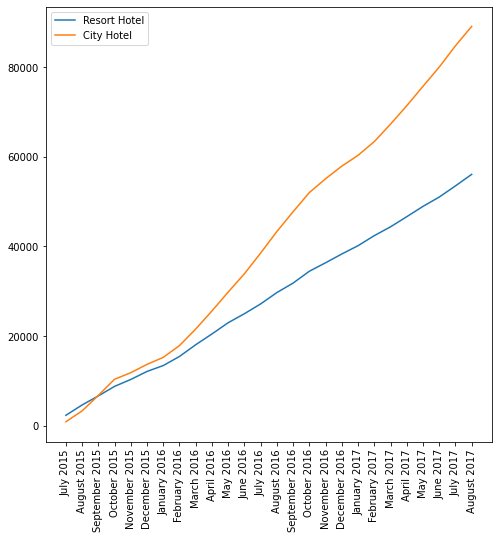

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(guestdf["Month_Year"], guestdf["Total Guest Resort Hotel"])
plt.plot(guestdf["Month_Year"], guestdf["Total Guest City Hotel"])
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=90)

Seems that there is a consistent growth in both hotels as per the amount of guests' arrivals during monsoon and winter, 2015. But there is a significant rise in the amount of arrivals in the City Hotel from spring, 2016 uptil the end of time of the data.